<a href="https://colab.research.google.com/github/basel5621/DEPI-Customer-Sentiment-and-Trend-Analysis/blob/main/EDA_and_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk import ngrams
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words=stopwords.words('english')
stop_words.remove('not')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load dataset

In [ ]:
CSV_LINK = 'https://drive.google.com/uc?id=1C5PYknjtsGValLOtjMQTxM694t0YrLxL'    #get analysis.csv from drive


In [ ]:
!gdown {CSV_LINK}

Downloading...
From: https://drive.google.com/uc?id=1C5PYknjtsGValLOtjMQTxM694t0YrLxL
To: /content/analysis.csv
100% 58.2M/58.2M [00:01<00:00, 42.0MB/s]


In [ ]:
df = pd.read_csv('analysis.csv')
df['cleaned_text'] = df['cleaned_text'].astype(str)

In [ ]:
df.head()

,cleaned_text,label,mentions,tags
0,rwanda set host headquarters united nation dev...,1.0,[],"['#SovereignGroup', '#SovereignAfrica', '#UNDP..."
1,suck since im focused nature aspect thing envi...,0.0,[],[]
2,social security constant political crisis dist...,0.0,[],[]
3,broken rib puncture lung lead collapsed lung m...,0.0,['@FilmThePoliceLA'],[]
4,agree flawed response small many pl people pre...,0.0,"['@jacobringenwald', '@aKeithWatts', '@CountDa...",[]


## show most mention person

In [ ]:
def get_top_mentions(mentions , top_n=10):
    mention_list = []
    for mention in mentions:
      if mention != '[]':
        mention_list.extend(eval(mention))

    mentions_freq = Counter(mention_list)
    return mentions_freq.most_common(top_n)
top_mentions =get_top_mentions(df['mentions'])
print("Top mentions:", top_mentions)

Top mentions: [('@BTS_twt', 1184), ('@RepMTG', 1062), ('@JudiciaryGOP', 1030), ('@POTUS', 934), ('@YouTube', 852), ('@PeterAlexander', 792), ('@FoxNews', 743), ('@AOC', 667), ('@dh4onethingonly', 635), ('@KenzeeGiles', 623)]


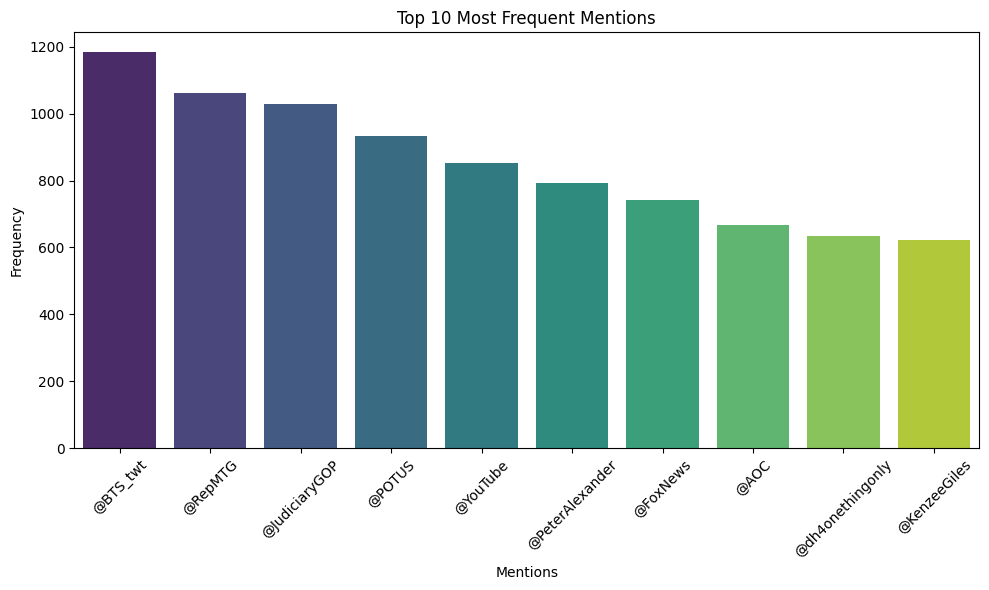

In [ ]:
mentions = [mention for mention, count in top_mentions]
counts = [count for mention, count in top_mentions]

plt.figure(figsize=(10, 6))
sns.barplot(x=mentions, y=counts, palette="viridis")
plt.xlabel('Mentions')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Trend

In [ ]:
def get_top_tags(tags , top_n=10):
    tags_list = []
    for tag in tags:
      if tag != '[]':
        tags_list.extend(eval(tag))

    tags_freq = Counter(tags_list)
    return tags_freq.most_common(top_n)

top_tags=get_top_tags(df['tags'])
print("Top trend:",top_tags)

Top trend: [('#innovation', 3519), ('#Innovation', 1623), ('#traffic', 1095), ('#LoveIsland', 825), ('#technology', 681), ('#AI', 571), ('#etsy', 538), ('#shopmycloset', 534), ('#Wimbledon', 513), ('#fashion', 506)]


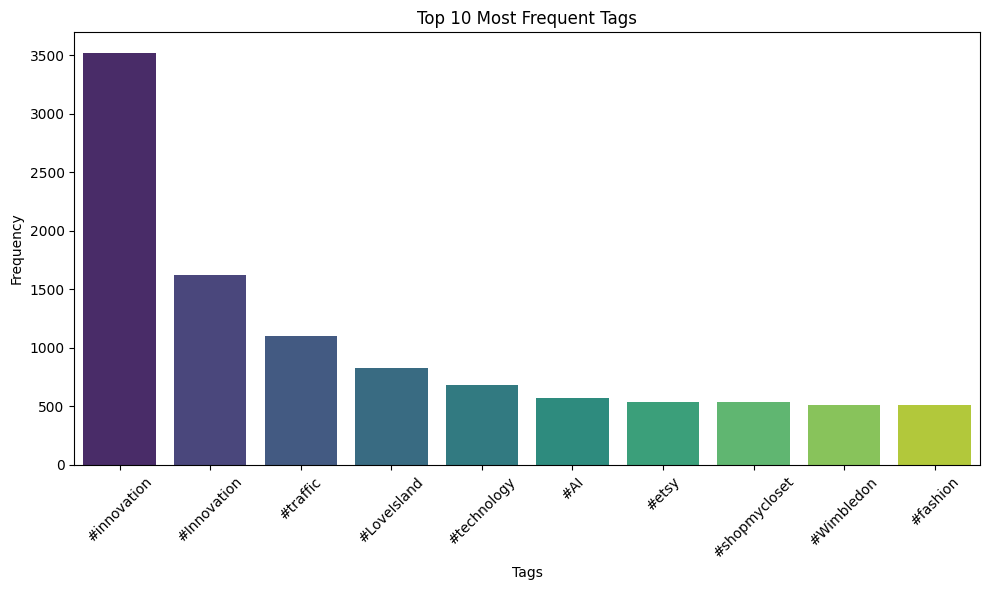

In [ ]:
tags = [tag for tag, count in top_tags]
counts = [count for tag, count in top_tags]

plt.figure(figsize=(10, 6))
sns.barplot(x=tags , y=counts, palette="viridis")
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Tags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Show common word

[(6, 26530), (5, 26090), (4, 26083), (7, 24939), (3, 24659), (8, 24005), (9, 22878), (2, 21624), (10, 21004), (11, 19185), (12, 18122), (13, 16892), (14, 15809), (15, 14734), (16, 14230), (17, 13838), (23, 13495), (22, 13450), (24, 13392), (21, 13387), (18, 13368), (19, 13327), (20, 13105), (25, 12530), (26, 11013), (27, 9358), (1, 9278), (28, 7672), (29, 5359), (30, 3891)]


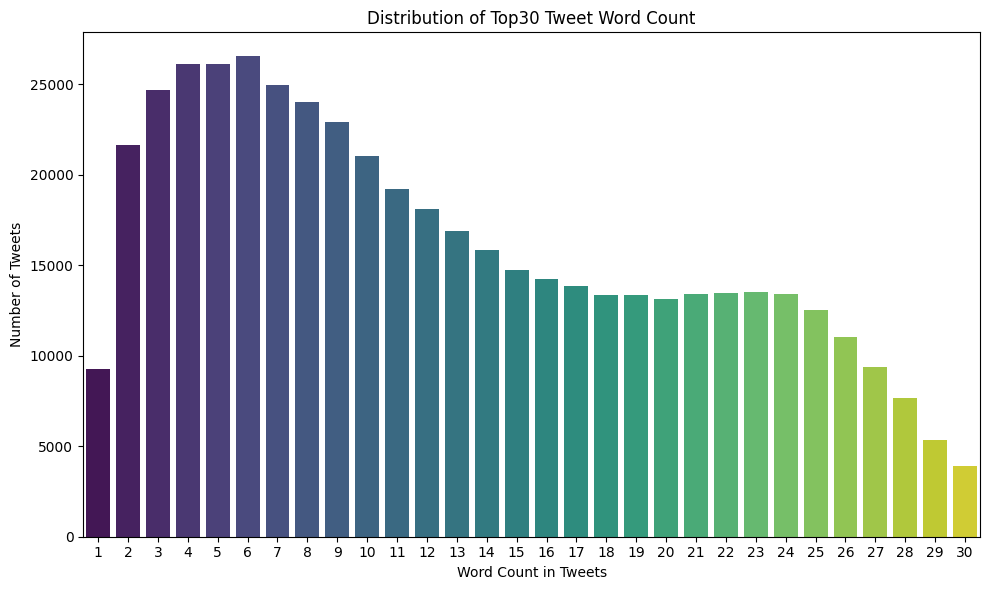

In [ ]:
# Add a new column for word count in each tweet
word_count =df['cleaned_text'].apply(lambda x: len(x.split()))

word_count_freq = Counter(word_count)
common_word_count = word_count_freq.most_common(30)
print(common_word_count)
common_word_count.sort(key=lambda x: x[0])
label=[l  for l , _ in common_word_count]
count=[c  for _ , c in common_word_count]


plt.figure(figsize=(10, 6))
sns.barplot(x=label, y=count, palette="viridis")
plt.title('Distribution of Top30 Tweet Word Count')
plt.xlabel('Word Count in Tweets')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
# Tokenize tweets into words
all_words = nltk.word_tokenize(' '.join(df['cleaned_text']))

# Find the most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print(common_words)

[('not', 67838), ('good', 46656), ('im', 44343), ('like', 41539), ('one', 34710), ('people', 34686), ('get', 34518), ('best', 34017), ('dont', 33047), ('bad', 32769), ('wrong', 32345), ('problem', 30633), ('excited', 30163), ('easier', 29805), ('incredible', 29617), ('poor', 29551), ('improve', 29427), ('perfect', 29217), ('lost', 29029), ('flawed', 28867)]


In [ ]:
positive_tweets = df[df['label'] == 1]['cleaned_text']
negative_tweets = df[df['label'] == 0]['cleaned_text']

# Define a function to get the top N bigrams
def get_top_ngrams(corpus, n=2, top_n=10):
    ngram_list = []
    for sentence in corpus:
        tokens = nltk.word_tokenize(sentence)
        ngrams_list = list(ngrams(tokens, n))
        ngram_list.extend(ngrams_list)

    ngram_freq = Counter(ngram_list)
    return ngram_freq.most_common(top_n)

# Get top bigrams in positive tweets
positive_bigrams = get_top_ngrams(positive_tweets, n=2)
print("Top Positive Bigrams:", positive_bigrams)

Top Positive Bigrams: [(('im', 'excited'), 7322), (('much', 'easier'), 3490), (('good', 'morning'), 2843), (('make', 'easier'), 2592), (('gon', 'na'), 2295), (('excited', 'see'), 2234), (('sweet', 'dream'), 1983), (('im', 'not'), 1747), (('one', 'best'), 1743), (('good', 'luck'), 1632)]


In [ ]:
# Get top bigrams in negative tweets
negative_bigrams = get_top_ngrams(negative_tweets, n=2)
print("Top Negative Bigrams:", negative_bigrams)

Top Negative Bigrams: [(('im', 'not'), 2553), (('gon', 'na'), 2266), (('car', 'accident'), 2048), (('dont', 'know'), 1942), (('answer', 'question'), 1898), (('wan', 'na'), 1543), (('not', 'bad'), 1512), (('dont', 'think'), 1477), (('whats', 'wrong'), 1460), (('feel', 'like'), 1419)]


In [ ]:
# Get top bigrams in positive tweets
positive_bigrams = get_top_ngrams(positive_tweets, n=3)
print("Top Positive Bigrams:", positive_bigrams)

Top Positive Bigrams: [(('dream', 'come', 'true'), 865), (('easier', 'said', 'done'), 651), (('im', 'excited', 'see'), 581), (('make', 'life', 'easier'), 483), (('good', 'share', 'check'), 458), (('share', 'check', 'item'), 458), (('check', 'item', 'im'), 458), (('item', 'im', 'loving'), 458), (('im', 'gon', 'na'), 392), (('cant', 'wait', 'see'), 358)]


In [ ]:
# Get top bigrams in negative tweets
negative_bigrams = get_top_ngrams(negative_tweets, n=3)
print("Top Negative Bigrams:", negative_bigrams)

Top Negative Bigrams: [(('roe', 'v', 'wade'), 831), (('dont', 'get', 'wrong'), 444), (('stop', 'go', 'traffic'), 390), (('go', 'traffic', 'back'), 384), (('im', 'gon', 'na'), 335), (('im', 'not', 'sure'), 281), (('right', 'lane', 'blocked'), 246), (('stopped', 'traffic', 'back'), 240), (('left', 'lane', 'blocked'), 233), (('there', 'nothing', 'wrong'), 226)]


## Generate Word Clouds

### positive word

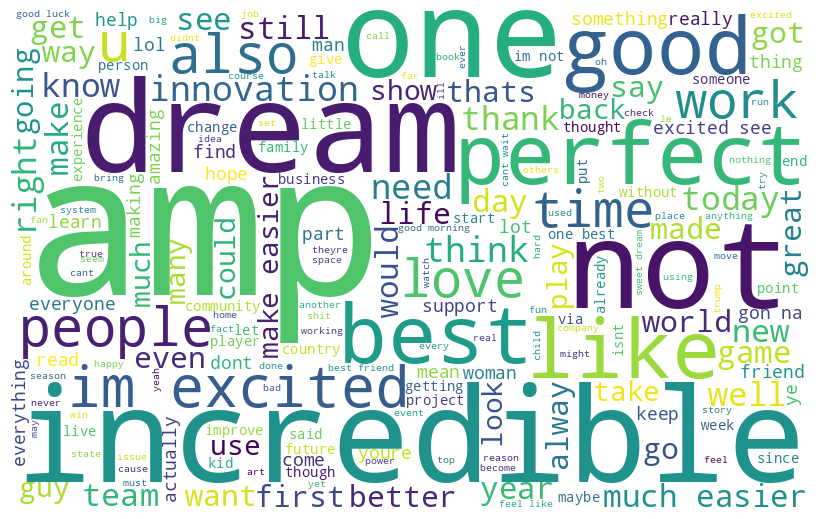

In [ ]:
words_list = df[df['label']==1]['cleaned_text'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,background_color='white',
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 10), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### negative word

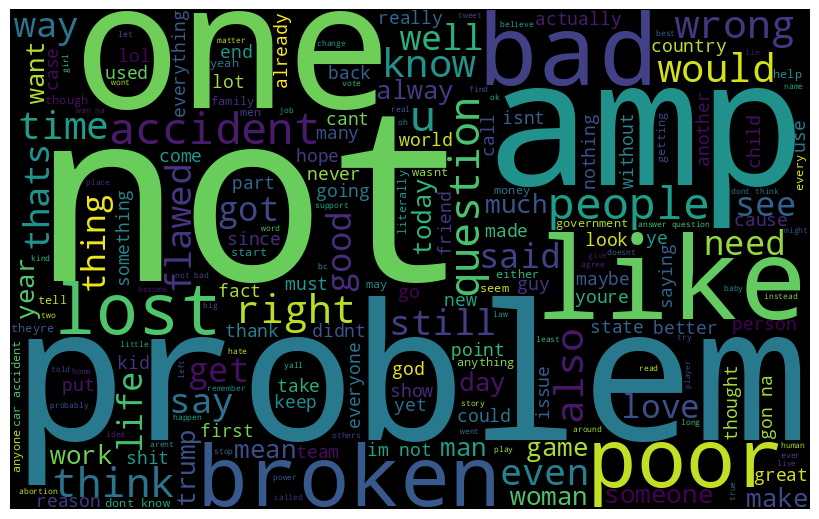

In [ ]:
words_list = df[df['label']==0]['cleaned_text'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 10), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Split the dataset into train and test

In [ ]:
df_ready = df[['cleaned_text','label']]

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test  = train_test_split(df_ready , test_size=0.2, random_state=7,shuffle=True)
# df_val, df_test  = train_test_split(df_temp , test_size=0.5, random_state=7)

print("Train data size ",df_train.shape[0])
print("Test data size ",df_test.shape[0])

Train data size  392314
Test data size  98079


In [ ]:
df_train.reset_index(drop=True,inplace=True)
# df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_train.head()

,cleaned_text,label
0,devil swallow hence problem,0.0
1,already happened uglylives lost potential lost...,0.0
2,hmm yeah perhaps claim x isnt real thing youve...,0.0
3,look greasy smelly picture perfect image slime...,1.0
4,speaker also talked growth sector innovation w...,1.0


In [ ]:
df_train.shape  ,df_test.shape

((392314, 2), (98079, 2))

# save cleaned dataset

In [ ]:
df_train.to_csv('train.csv',index=False)

In [ ]:
# df_val.to_csv('val.csv',index=False)

In [ ]:
df_test.to_csv('test.csv',index=False)

# Training ML models

In [ ]:
X_train=df_train['cleaned_text']
y_train=df_train['label']

# X_val=df_val['cleaned_text']
# y_val=df_val['label']

X_test=df_test['cleaned_text']
y_test=df_test['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF= TfidfVectorizer(max_features=500000)

TF_train= TF.fit_transform(X_train)
TF_test =TF.transform(X_test)

# 4. Building ML Classifiers

## score functions

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def plot_confusion_matrix(model,x,y):
    y_pred=model.predict(x)
    cm=confusion_matrix(y_true=y,y_pred=y_pred)

    disp=ConfusionMatrixDisplay(cm,display_labels= model.classes_)
    disp.plot()
    plt.show()

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
def my_scores(model,x,y):
    y_pred=model.predict(x)
    f_score=f1_score(y,y_pred,average='weighted')
    recall=recall_score(y,y_pred,average='weighted')
    precision=precision_score(y,y_pred,average='weighted')
    score=model.score(x,y)
    df_score=pd.DataFrame({'score':[score],'recall':[recall],'precision':[precision],'f1_score':[f_score]})
    return df_score

## LogisticRegression

In [ ]:
# from re import L
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import RandomizedSearchCV

# import warnings
# warnings.filterwarnings('ignore')

# parameters = {'C': np.logspace(-3, 3, 7),
#               'penalty':['l2', 'l1'],
#               'max_iter':[100,1000,3000,10000]
#               }
# Logistic_vector_model=LogisticRegression(random_state=5)
# grid = RandomizedSearchCV(Logistic_vector_model , param_distributions=parameters, cv=5, n_iter=5,verbose=3)
# grid.fit(TF_train, y_train)
# print("Best CV params", grid.best_params_)
# print("Best CV accuracy", grid.best_score_)
# print("Test accuracy of best grid search hypers:", grid.score(TF_test, y_test))


Best CV params {'**model__C**': 1.0, '**model__max_iter**': 3000, '**model__penalty**': 'l2'}

Best CV accuracy **0.9849227923467069**

Test accuracy of best grid search hypers: **0.9855422669480725**

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistic_vector_model=LogisticRegression(random_state=5,C=1.0,max_iter=3000,penalty='l2').fit(TF_train,y_train)
Logistic_vector_model.score(TF_test,y_test)

0.9855422669480725

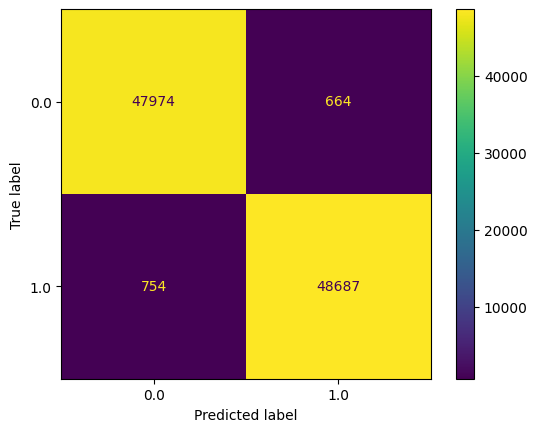

In [ ]:
plot_confusion_matrix(Logistic_vector_model , TF_test , y_test)

In [ ]:
df_LR_scores = my_scores(Logistic_vector_model , TF_test , y_test)
df_LR_scores = df_LR_scores.set_index(pd.Index(['LogisticRegression']))
df_LR_scores

,score,recall,precision,f1_score
LogisticRegression,0.985542,0.985542,0.985544,0.985542


## RandomForst with TFIDF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier()
param_dist = {
    'n_estimators': np.arange(10, 300, 10),   # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 30, 5)), # Maximum depth of tree
    'min_samples_split': np.arange(2, 15, 2),  # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 15, 2),   # Minimum number of samples required at each leaf node
}

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf,
                                      param_distributions=param_dist,
                                      n_iter=5,
                                      cv=5,
                                      verbose=3,
                                      random_state=42)

rf_random_search.fit(TF_train, y_train)

# Print the best parameters and best estimator
print("Best Parameters:", rf_random_search.best_params_)
print("Best Estimator:", rf_random_search.best_estimator_)

# Evaluate on the test data
test_score = rf_random_search.score(TF_test, y_test)
print("Test Accuracy:", test_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_TF_model = RandomForestClassifier(random_state=7,max_depth=10)
random_forest_TF_model.fit(TF_train, y_train)
random_forest_TF_model.score(TF_test, y_test)

0.9312085155843759

In [ ]:
df_RF_scores = my_scores(random_forest_TF_model , TF_test , y_test)
df_RF_scores = df_RF_scores.set_index(pd.Index(['Random forst']))
df_RF_scores

,score,recall,precision,f1_score
Random forst,0.931209,0.931209,0.933464,0.931097


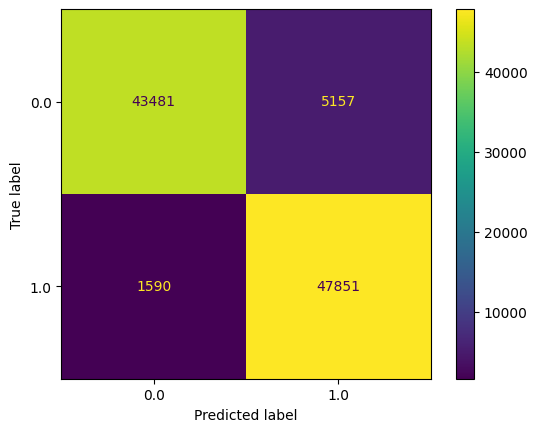

In [ ]:
plot_confusion_matrix(random_forest_TF_model , TF_test , y_test)

## SVM with TFIDF

In [ ]:
from sklearn.svm import SVC

svm_model= SVC(random_state=7)
svm_model.fit(TF_train, y_train)
svm_model.score(TF_test, y_test)

In [ ]:
plot_confusion_matrix(svm_model , TF_test , y_test)

In [ ]:
df_SVM_scores = my_scores(svm_model , TF_test , y_test)
df_SVM_scores = df_SVM_scores.set_index(pd.Index(['SVM']))
df_SVM_scores